In [187]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [188]:
# Load the layoff dataset.
file_path = "./Resources/layoffs.csv"
layoff_df = pd.read_csv(file_path, index_col=False)
layoff_df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,country,mass_layoff,global_industry
0,Pear Therapeutics,Boston,Healthcare,170.0,0.92,2023-04-07,United States,1.0,Healthcare
1,ZestMoney,Bengaluru,Finance,100.0,0.20,2023-04-07,India,1.0,Financial
2,Absolute Software,Vancouver,Security,40.0,0.05,2023-04-06,Canada,0.0,Industrial
3,Avocargo,Berlin,Transportation,16.0,1.00,2023-04-06,Germany,0.0,Energy
4,Dunzo,Bengaluru,Food,300.0,0.30,2023-04-05,India,1.0,Consumer_Staples


In [189]:
#Drop columns that are useless
lay = layoff_df.drop(columns=['funds_raised', 'stage'])
lay.head()

KeyError: "['funds_raised', 'stage'] not found in axis"

In [167]:
#Check dtypes
lay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              2473 non-null   object 
 1   location             2473 non-null   object 
 2   industry             2471 non-null   object 
 3   total_laid_off       1696 non-null   float64
 4   percentage_laid_off  1643 non-null   float64
 5   date                 2472 non-null   object 
 6   country              2473 non-null   object 
dtypes: float64(2), object(5)
memory usage: 135.4+ KB


In [168]:
# Convert dates to datetime

lay['date']= pd.to_datetime(lay['date'])
print(lay.dtypes)

company                        object
location                       object
industry                       object
total_laid_off                float64
percentage_laid_off           float64
date                   datetime64[ns]
country                        object
dtype: object


In [169]:
#Check check table for Null values
lay.isnull().any()

company                False
location               False
industry                True
total_laid_off          True
percentage_laid_off     True
date                    True
country                False
dtype: bool

In [170]:
#Drop the null rows and keep other table
lay = lay.dropna()
lay.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,country
0,Pear Therapeutics,Boston,Healthcare,170.0,0.92,2023-04-07,United States
1,ZestMoney,Bengaluru,Finance,100.0,0.20,2023-04-07,India
2,Absolute Software,Vancouver,Security,40.0,0.05,2023-04-06,Canada
3,Avocargo,Berlin,Transportation,16.0,1.00,2023-04-06,Germany
4,Dunzo,Bengaluru,Food,300.0,0.30,2023-04-05,India


In [171]:
#Check table again for Null values
lay.isnull().any()

company                False
location               False
industry               False
total_laid_off         False
percentage_laid_off    False
date                   False
country                False
dtype: bool

In [172]:
#Add question column if more than 49 employees are laid off, 1 is true and 0 is false
pd.options.mode.chained_assignment = None  # default='warn'
lay['mass_layoff'] = np.where(lay['total_laid_off'] > 49, 1, 0)
lay.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,country,mass_layoff
0,Pear Therapeutics,Boston,Healthcare,170.0,0.92,2023-04-07,United States,1
1,ZestMoney,Bengaluru,Finance,100.0,0.20,2023-04-07,India,1
2,Absolute Software,Vancouver,Security,40.0,0.05,2023-04-06,Canada,0
3,Avocargo,Berlin,Transportation,16.0,1.00,2023-04-06,Germany,0
4,Dunzo,Bengaluru,Food,300.0,0.30,2023-04-05,India,1


In [173]:
lay.dtypes

company                        object
location                       object
industry                       object
total_laid_off                float64
percentage_laid_off           float64
date                   datetime64[ns]
country                        object
mass_layoff                     int32
dtype: object

In [174]:
# Create dataframe to check for 1st Quarter
lay1 = lay[(lay['date'] > "2021-12-31")&(lay['date'] < "2022-04-01")]
lay1.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,country,mass_layoff
1762,Rasa,Berlin,Data,59.0,0.40,2022-03-30,Germany,1
1763,Gopuff,Philadelphia,Food,450.0,0.03,2022-03-29,United States,1
1764,Thinkific,Vancouver,Education,100.0,0.20,2022-03-29,Canada,1
1767,Storytel,Stockholm,Media,100.0,0.10,2022-03-17,Sweden,1
1769,Trell,Bengaluru,Retail,300.0,0.50,2022-03-15,India,1


In [175]:
# Create dataframe to check for 2nd Quarter
lay2 = lay[(lay['date'] > "2022-03-31")&(lay['date'] < "2022-07-01")]
lay2.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,country,mass_layoff
1457,Enjoy,SF Bay Area,Retail,400.0,0.18,2022-06-30,United States,1
1458,Crejo.Fun,Bengaluru,Education,170.0,1.00,2022-06-30,India,1
1459,Stash Financial,New York City,Finance,40.0,0.08,2022-06-30,United States,0
1460,Nate,New York City,Retail,30.0,0.20,2022-06-30,United States,0
1462,Stream,Boulder,Product,20.0,0.12,2022-06-30,United States,0


In [176]:
# Create dataframe to check for 3rd Quarter
lay3 = lay[(lay['date'] > "2022-06-30")&(lay['date'] < "2022-10-01")]
lay3.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,country,mass_layoff
1045,Spin,SF Bay Area,Transportation,78.0,0.10,2022-09-30,United States,1
1050,Mux,SF Bay Area,Infrastructure,40.0,0.20,2022-09-29,United States,0
1053,DocuSign,SF Bay Area,Sales,671.0,0.09,2022-09-28,United States,1
1056,Divvy Homes,SF Bay Area,Real Estate,40.0,0.12,2022-09-27,United States,0
1060,Moss,Berlin,Finance,70.0,0.15,2022-09-23,Germany,1


In [177]:
# Create dataframe to check for 4th Quarter
lay4 = lay[(lay['date'] > "2022-9-30")&(lay['date'] < "2023-01-01")]
lay4.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,country,mass_layoff
580,PayU,Amsterdam,Finance,150.0,0.06,2022-12-26,Netherlands,1
582,Willow,Sydney,Real Estate,99.0,0.22,2022-12-23,Australia,1
583,Back Market,Paris,Retail,93.0,0.13,2022-12-23,France,1
586,TuSimple,San Diego,Transportation,350.0,0.25,2022-12-21,United States,1
588,Chope,Singapore,Food,65.0,0.24,2022-12-20,Singapore,1


In [180]:
lay.nunique()

company                1071
location                131
industry                 29
total_laid_off          259
percentage_laid_off      74
date                    385
country                  39
mass_layoff               2
dtype: int64

In [181]:
lay_x = lay.drop(['company'],axis=1)
lay_x.head()

,location,industry,total_laid_off,percentage_laid_off,date,country,mass_layoff
0,Boston,Healthcare,170.0,0.92,2023-04-07,United States,1
1,Bengaluru,Finance,100.0,0.20,2023-04-07,India,1
2,Vancouver,Security,40.0,0.05,2023-04-06,Canada,0
3,Berlin,Transportation,16.0,1.00,2023-04-06,Germany,0
4,Bengaluru,Food,300.0,0.30,2023-04-05,India,1


In [182]:
X = pd.get_dummies(lay_x)
X.describe()

,total_laid_off,percentage_laid_off,mass_layoff,location_Ahmedabad,location_Albany,location_Amsterdam,location_Ann Arbor,location_Atlanta,location_Auckland,location_Austin,...,country_Seychelles,country_Singapore,country_South Korea,country_Spain,country_Sweden,country_Switzerland,country_Thailand,country_United Arab Emirates,country_United Kingdom,country_United States
count,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,...,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000
mean,278.466667,0.224697,0.684337,0.000803,0.000803,0.005622,0.001606,0.005622,0.000803,0.014458,...,0.000803,0.016867,0.000803,0.001606,0.008835,0.000803,0.000803,0.003213,0.032129,0.636145
std,882.022619,0.210502,0.464966,0.028341,0.028341,0.074802,0.040064,0.074802,0.028341,0.119416,...,0.028341,0.128827,0.028341,0.040064,0.093618,0.028341,0.028341,0.056614,0.176412,0.481301
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,83.000000,0.160000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,200.000000,0.280000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,12000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [185]:
target = lay["mass_layoff"]

In [186]:
y = lay.loc[:, target].copy()

ValueError: Cannot index with multidimensional key

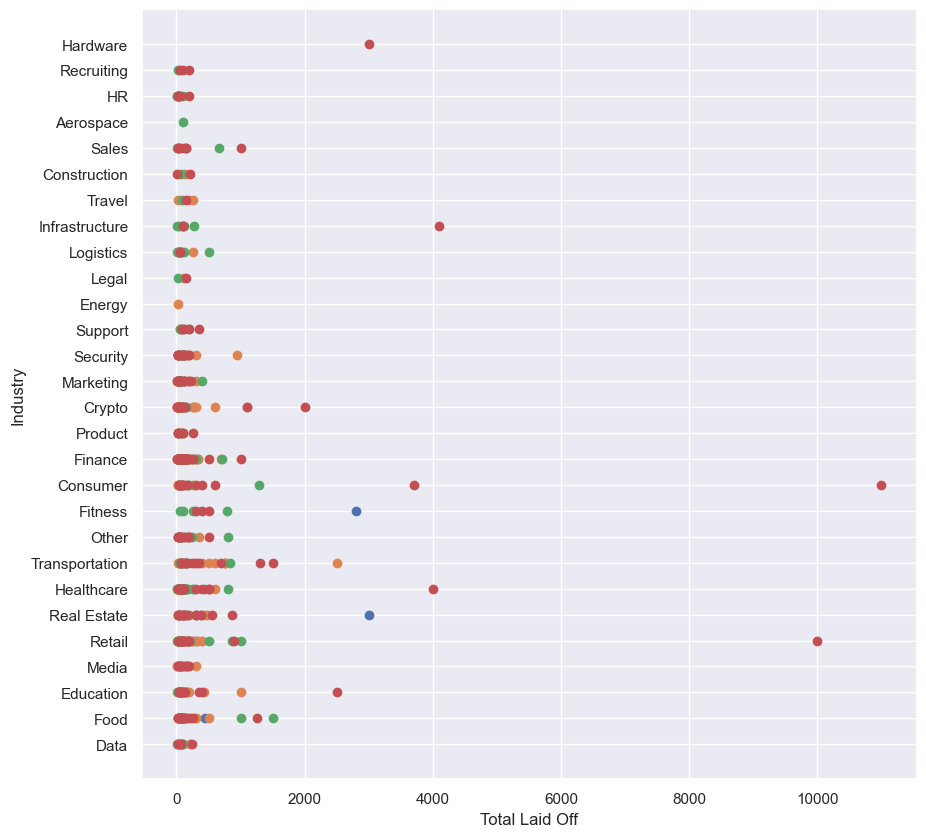

In [121]:
plt.figure(figsize=(10,10))
plt.scatter(x='total_laid_off',y='industry',data=lay1)
plt.scatter(x='total_laid_off',y='industry',data=lay2)
plt.scatter(x='total_laid_off',y='industry',data=lay3)
plt.scatter(x='total_laid_off',y='industry',data=lay4)
plt.xlabel('Total Laid Off')
plt.ylabel('Industry')
sns.set(style="darkgrid")
plt.show()

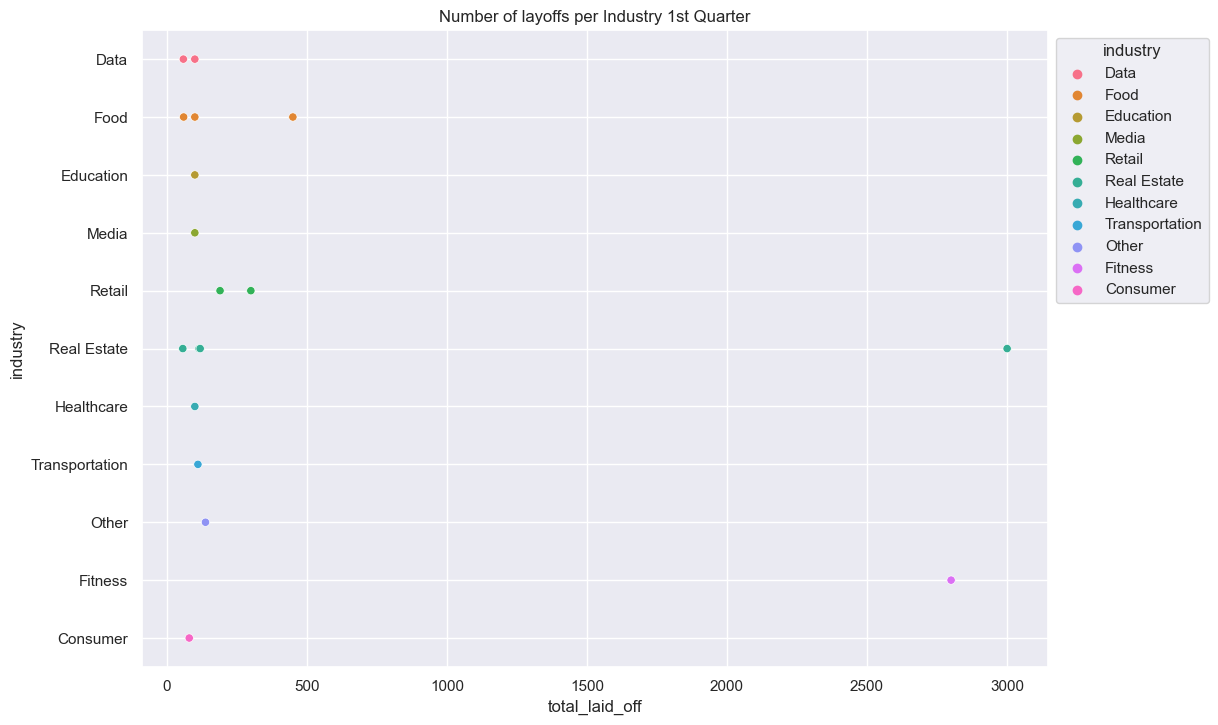

In [122]:
ax= sns.scatterplot(x= 'total_laid_off',
        y= 'industry',
                hue='industry',
               data=lay1)
ax.set_title('Number of layoffs per Industry 1st Quarter')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.show()

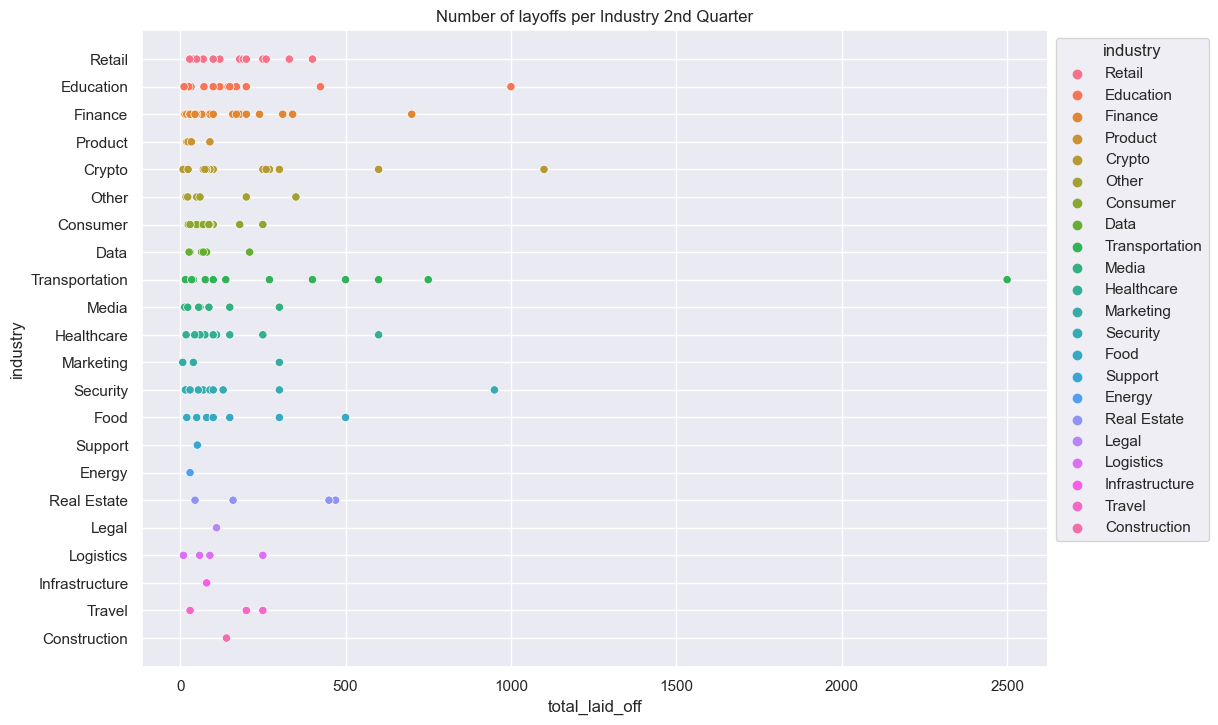

In [123]:
ax= sns.scatterplot(x= 'total_laid_off',
        y= 'industry',
                hue='industry',
               data=lay2)
ax.set_title('Number of layoffs per Industry 2nd Quarter')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.show()

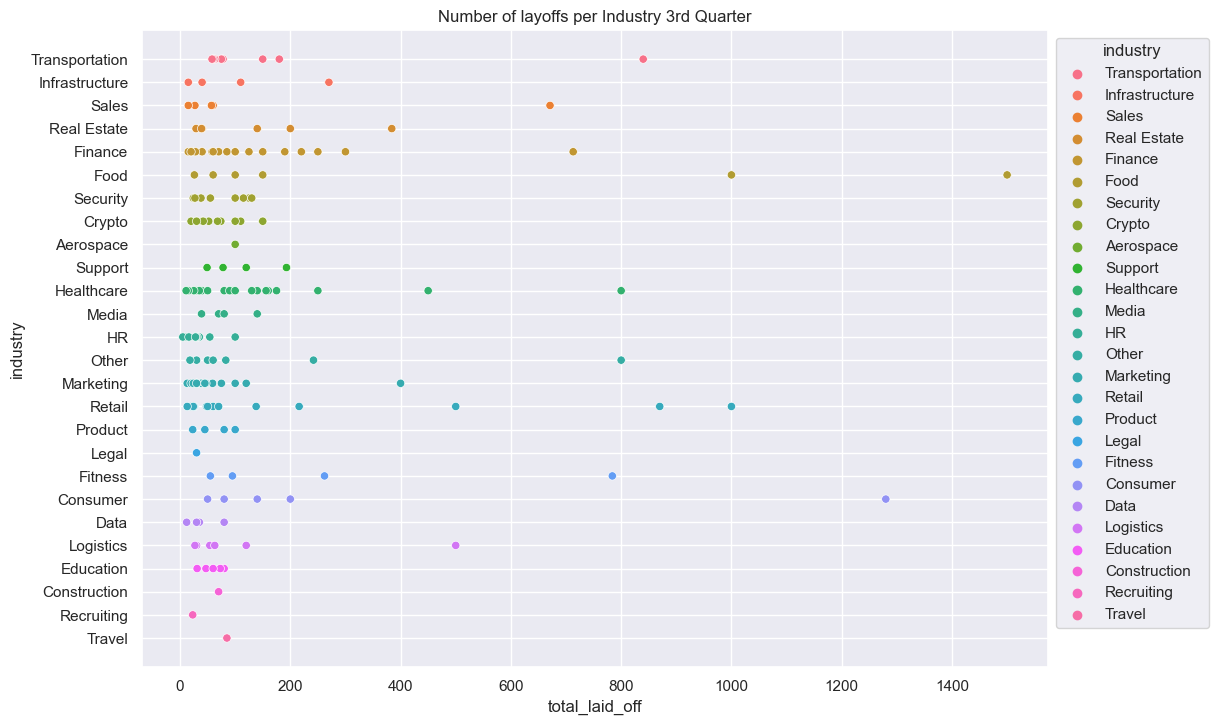

In [124]:
ax= sns.scatterplot(x= 'total_laid_off',
        y= 'industry',
                hue='industry',
               data=lay3)
ax.set_title('Number of layoffs per Industry 3rd Quarter')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.show()

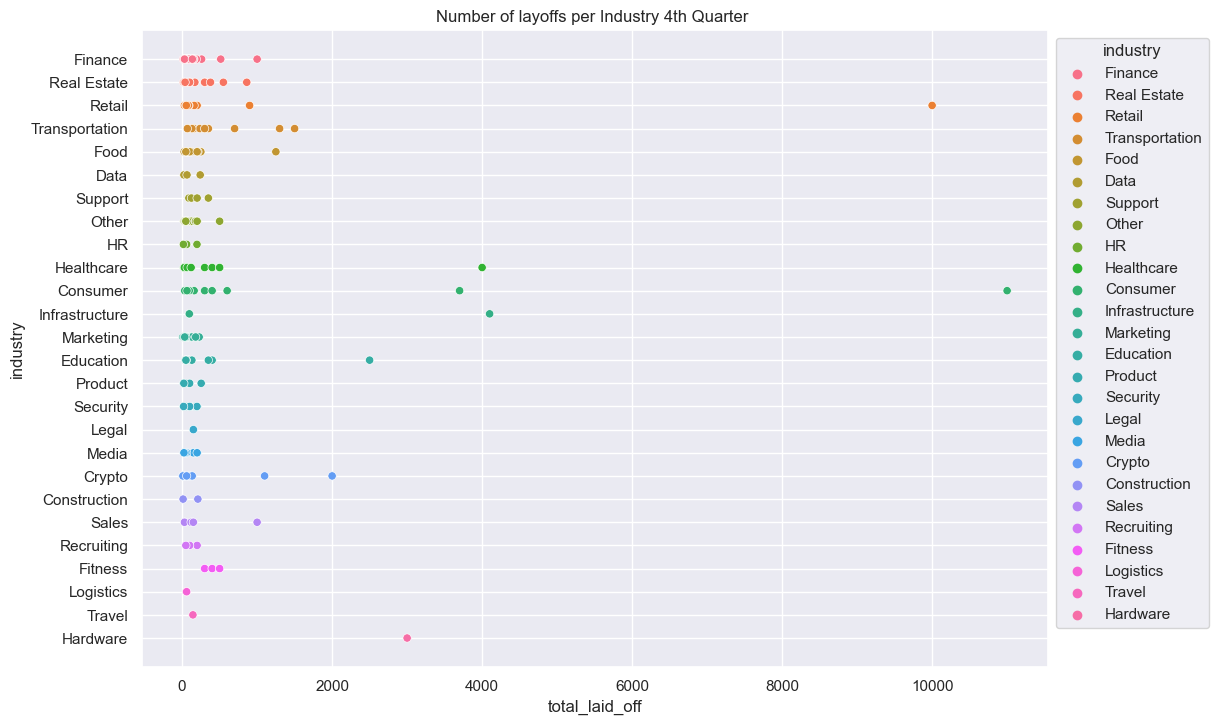

In [125]:
ax= sns.scatterplot(x= 'total_laid_off',
        y= 'industry',
                hue='industry',
               data=lay4)
ax.set_title('Number of layoffs per Industry 4th Quarter ')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

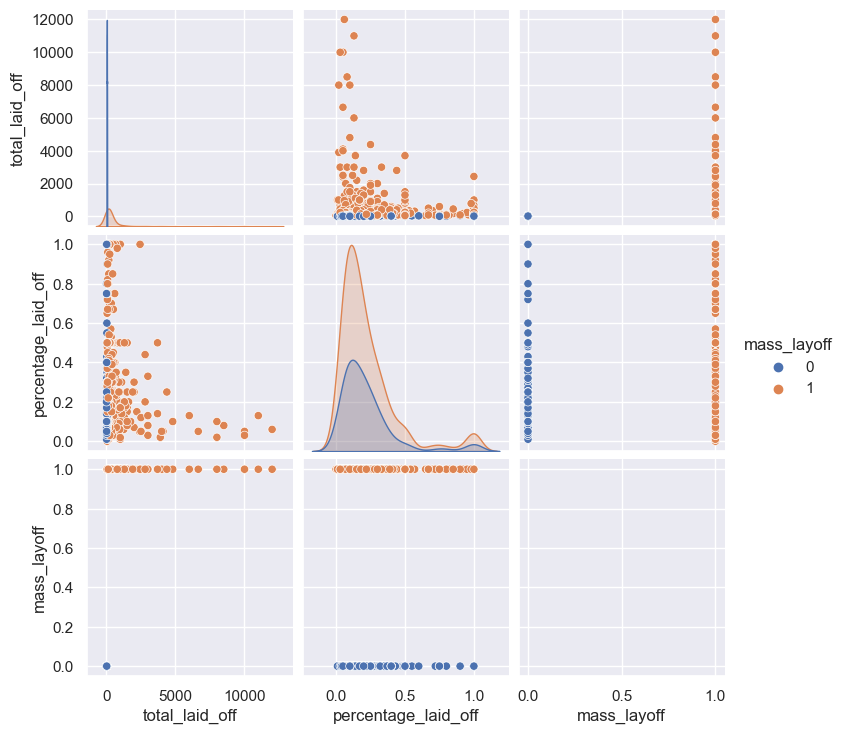

In [126]:
#Checked to see if there was any difference for 
sns.pairplot(lay, vars= ['total_laid_off', 'percentage_laid_off', 'mass_layoff'],
            hue= 'mass_layoff')
plt.show

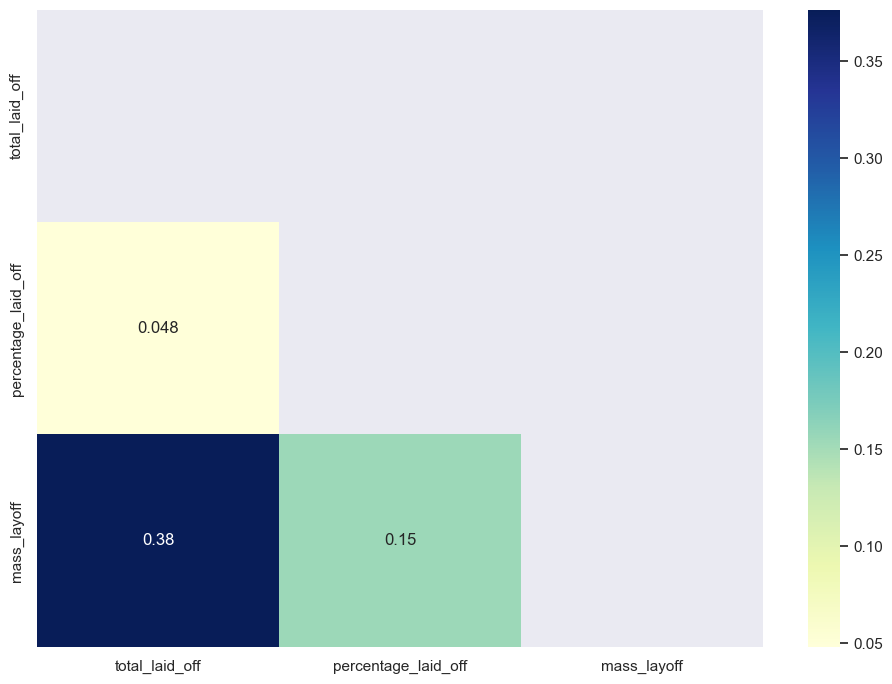

In [127]:
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(lay3.corr()))
 
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(lay3.corr(), cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
plt.show()

In [128]:
#Create Csv with Nan
lay.to_csv("quarter2_nan.csv", encoding="utf-8",index = False)

In [132]:
#Create CSV with all data
lay.to_csv("mass_layoff.csv", encoding="utf-8",index = False)